<a href="https://colab.research.google.com/github/osama629/finalproject/blob/main/myCode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
gunavenkatdoddi_eye_diseases_classification_path = kagglehub.dataset_download('gunavenkatdoddi/eye-diseases-classification')

print('Data source import complete.')


Data source import complete.


labels
diabetic_retinopathy    1098
normal                  1074
cataract                1038
glaucoma                1007
Name: count, dtype: int64


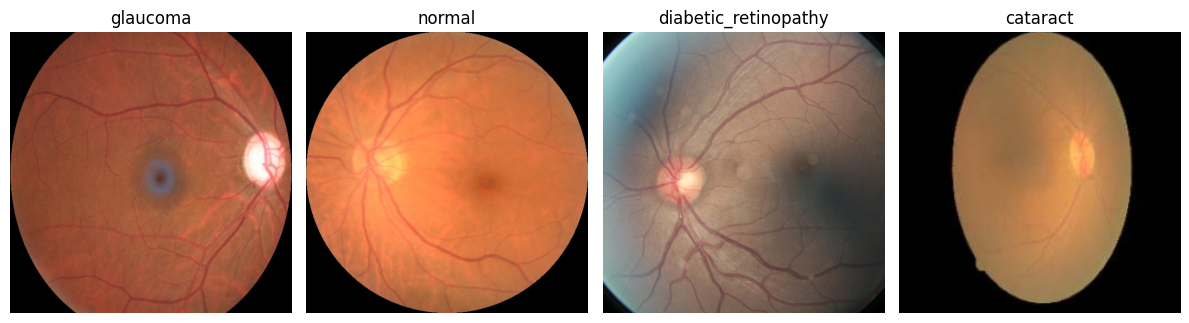

Found 3373 validated image filenames belonging to 4 classes.
Found 844 validated image filenames belonging to 4 classes.
29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training DenseNet121...


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
211/211 ━━━━━━━━━━━━━━━━━━━━ 312s 763ms/step - accuracy: 0.6851 - loss: 1.7818
Epoch 2/15
211/211 ━━━━━━━━━━━━━━━━━━━━ 71s 335ms/step - accuracy: 0.8699 - loss: 0.9483
Epoch 3/15
211/211 ━━━━━━━━━━━━━━━━━━━━ 71s 333ms/step - accuracy: 0.8829 - loss: 0.7571
Epoch 4/15
211/211 ━━━━━━━━━━━━━━━━━━━━ 83s 338ms/step - accuracy: 0.8920 - loss: 0.6395
Epoch 5/15
211/211 ━━━━━━━━━━━━━━━━━━━━ 71s 338ms/step - accuracy: 0.8985 - loss: 0.5445
Epoch 6/15
211/211 ━━━━━━━━━━━━━━━━━━━━ 83s 344ms/step - accuracy: 0.9037 - loss: 0.4614
Epoch 7/15
211/211 ━━━━━━━━━━━━━━━━━━━━ 71s 337ms/step - accuracy: 0.9151 - loss: 0.4071
Epoch 8/15
211/211 ━━━━━━━━━━━━━━━━━━━━ 71s 335ms/step - accuracy: 0.9165 - loss: 0.3812
Epoch 9/15
211/211 ━━━━━━━━━━━━━━━━━━━━ 71s 336ms/step - accuracy: 0.9191 - loss: 0.3242
Epoch 10/15
211/211 ━━━━━━━━━━━━━━━━━━━━ 71s 336ms/step - accuracy: 0.9159 - loss: 0.3286
Epoch 11/15
211/211 ━━━━━━━━━━━━━━━━━━━━ 82s 339ms/step - accuracy: 0.9254 - loss: 0.2894
Epoch 12/15
211/21

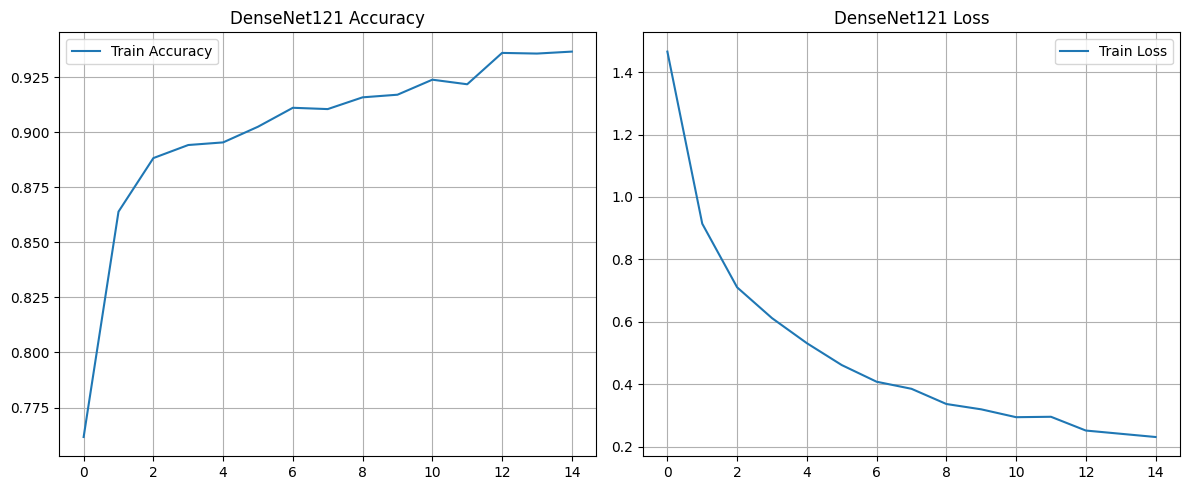

53/53 ━━━━━━━━━━━━━━━━━━━━ 27s 315ms/step


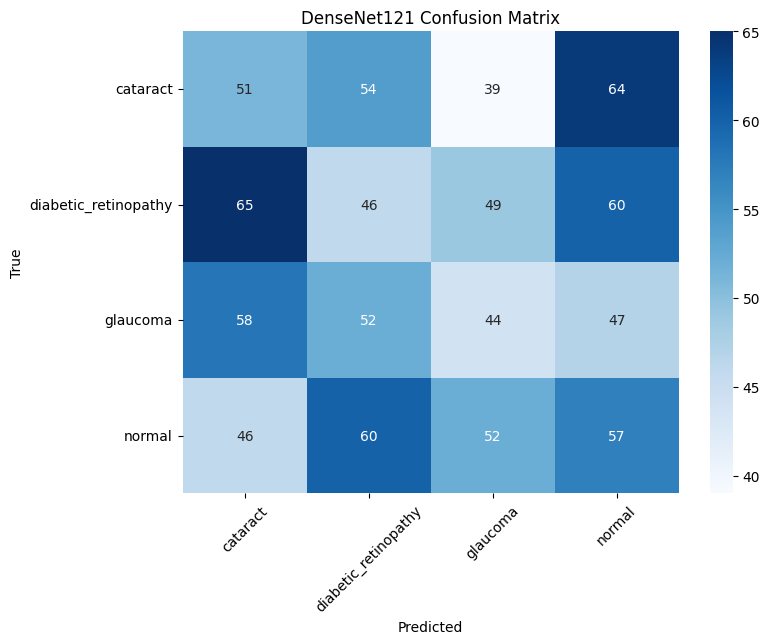

DenseNet121 Classification Report:

                      precision    recall  f1-score   support

            cataract       0.23      0.25      0.24       208
diabetic_retinopathy       0.22      0.21      0.21       220
            glaucoma       0.24      0.22      0.23       201
              normal       0.25      0.27      0.26       215

            accuracy                           0.23       844
           macro avg       0.23      0.23      0.23       844
        weighted avg       0.23      0.23      0.23       844

DenseNet121 model saved as DenseNet121.h5



In [ ]:
# 1. Imports
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization, GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.regularizers import l2
from tensorflow.keras.applications import DenseNet121

# 2. Load Data
data_dir = '/kaggle/input/eye-diseases-classification/dataset'
filepaths, labels = [], []
for folder in os.listdir(data_dir):
    for file in os.listdir(os.path.join(data_dir, folder)):
        filepaths.append(os.path.join(data_dir, folder, file))
        labels.append(folder)

df = pd.DataFrame({'filepaths': filepaths, 'labels': labels})
print(df['labels'].value_counts())

# 3. Visualize Sample Images
plt.figure(figsize=(12, 6))
shown = set()
for i in range(len(df)):
    if df['labels'].iloc[i] in shown:
        continue
    img = plt.imread(df['filepaths'].iloc[i])
    plt.subplot(1, 4, len(shown) + 1)
    plt.imshow(img)
    plt.title(df['labels'].iloc[i])
    plt.axis('off')
    shown.add(df['labels'].iloc[i])
    if len(shown) == 4:
        break
plt.tight_layout()
plt.show()

# 4. Split Data (Train + Test only)
train_df, test_df = train_test_split(df, test_size=0.2, stratify=df['labels'], random_state=42)

# 5. Data Generators
tr_gen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    brightness_range=(0.7, 1.3),
    shear_range=10,
    zoom_range=0.1,
    horizontal_flip=True,
    rescale=1./255
)
ts_gen = ImageDataGenerator(rescale=1./255)

train_gen = tr_gen.flow_from_dataframe(train_df, x_col='filepaths', y_col='labels',
                                       target_size=(224, 224), class_mode='categorical', batch_size=16)
test_gen = ts_gen.flow_from_dataframe(test_df, x_col='filepaths', y_col='labels',
                                      target_size=(224, 224), class_mode='categorical', batch_size=16)

# 6. Callback
early_stop = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5, restore_best_weights=True)

# 7. Build DenseNet121 Model
def build_model(base_model_fn, name):
    base_model = base_model_fn(include_top=False, weights='imagenet', input_shape=(224, 224, 3))
    model = Sequential([
        base_model,
        BatchNormalization(),
        GlobalAveragePooling2D(),
        Dense(64, activation='relu', kernel_initializer='HeNormal', kernel_regularizer=l2(0.01)),
        Dropout(0.5),
        Dense(4, activation='softmax')
    ])
    model.compile(optimizer=Adamax(), loss='categorical_crossentropy', metrics=['accuracy'])
    model._name = name
    return model

# 8. Train & Evaluate Function
def train_evaluate_model(model, name):
    print(f"Training {name}...")
    history = model.fit(train_gen, epochs=15, batch_size=16, callbacks=[early_stop])

    print(f"Evaluating {name}...")
    model.evaluate(test_gen)

    # Plot training history
    hist_df = pd.DataFrame(history.history)
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(hist_df['accuracy'], label='Train Accuracy')
    plt.title(f'{name} Accuracy')
    plt.legend()
    plt.grid(True)

    plt.subplot(1, 2, 2)
    plt.plot(hist_df['loss'], label='Train Loss')
    plt.title(f'{name} Loss')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Confusion matrix
    true_labels = test_gen.classes
    class_names = list(test_gen.class_indices.keys())
    preds = model.predict(test_gen)
    pred_labels = np.argmax(preds, axis=1)

    cm = confusion_matrix(true_labels, pred_labels)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names, yticklabels=class_names)
    plt.title(f"{name} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.show()

    print(f"{name} Classification Report:\n")
    print(classification_report(true_labels, pred_labels, target_names=class_names))

    model.save(f"{name}.h5")
    print(f"{name} model saved as {name}.h5\n")

# 9. Build, Train, Evaluate DenseNet121
densenet_model = build_model(DenseNet121, "DenseNet121")
train_evaluate_model(densenet_model, "DenseNet121")


labels
diabetic_retinopathy    1098
normal                  1074
cataract                1038
glaucoma                1007
Name: count, dtype: int64


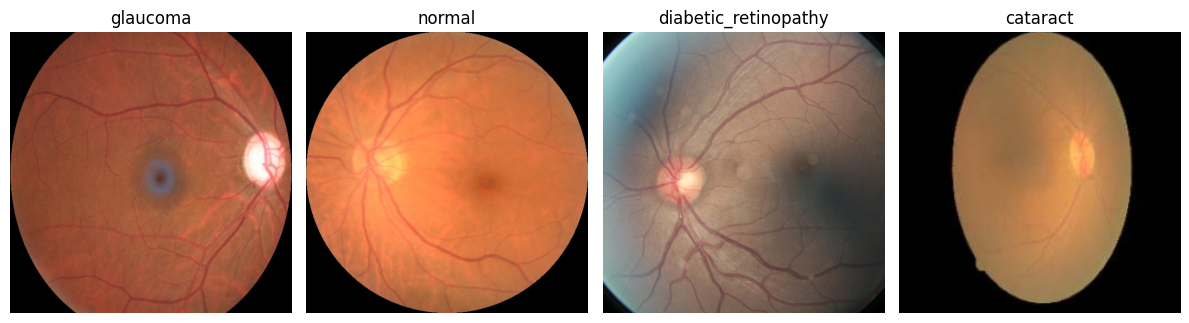

Found 3373 validated image filenames belonging to 4 classes.
Found 844 validated image filenames belonging to 4 classes.
43941136/43941136 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training EfficientNetB3...


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
211/211 ━━━━━━━━━━━━━━━━━━━━ 265s 688ms/step - accuracy: 0.6702 - loss: 1.9917
Epoch 2/15
211/211 ━━━━━━━━━━━━━━━━━━━━ 72s 339ms/step - accuracy: 0.8456 - loss: 1.2489
Epoch 3/15
211/211 ━━━━━━━━━━━━━━━━━━━━ 76s 360ms/step - accuracy: 0.8809 - loss: 0.9040
Epoch 4/15
211/211 ━━━━━━━━━━━━━━━━━━━━ 76s 333ms/step - accuracy: 0.8890 - loss: 0.6916
Epoch 5/15
211/211 ━━━━━━━━━━━━━━━━━━━━ 70s 333ms/step - accuracy: 0.9081 - loss: 0.5491
Epoch 6/15
211/211 ━━━━━━━━━━━━━━━━━━━━ 81s 327ms/step - accuracy: 0.9148 - loss: 0.4528
Epoch 7/15
211/211 ━━━━━━━━━━━━━━━━━━━━ 69s 329ms/step - accuracy: 0.9211 - loss: 0.3830
Epoch 8/15
211/211 ━━━━━━━━━━━━━━━━━━━━ 71s 335ms/step - accuracy: 0.9334 - loss: 0.3182
Epoch 9/15
211/211 ━━━━━━━━━━━━━━━━━━━━ 72s 340ms/step - accuracy: 0.9272 - loss: 0.3143
Epoch 10/15
211/211 ━━━━━━━━━━━━━━━━━━━━ 69s 326ms/step - accuracy: 0.9462 - loss: 0.2404
Epoch 11/15
211/211 ━━━━━━━━━━━━━━━━━━━━ 83s 329ms/step - accuracy: 0.9521 - loss: 0.2178
Epoch 12/15
211/21

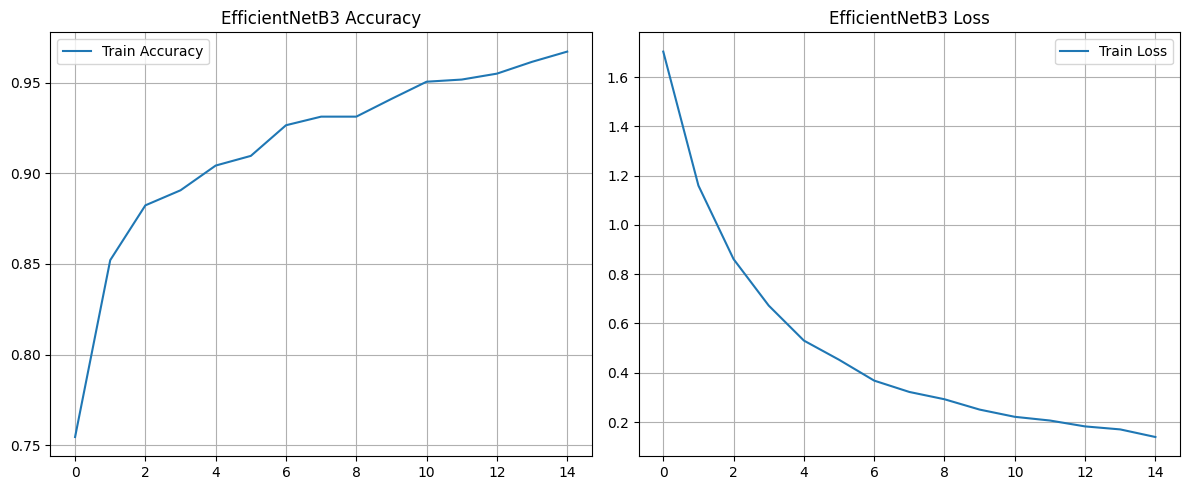

53/53 ━━━━━━━━━━━━━━━━━━━━ 23s 280ms/step


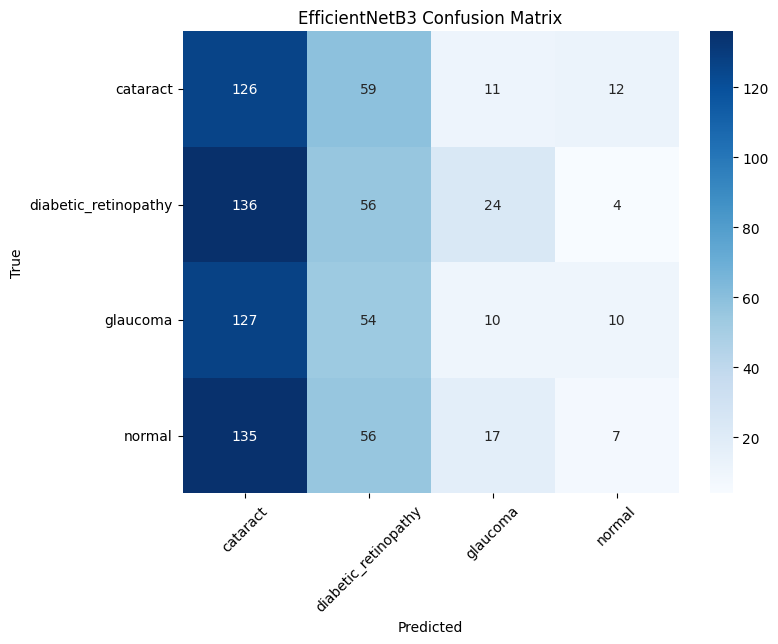

EfficientNetB3 Classification Report:

                      precision    recall  f1-score   support

            cataract       0.24      0.61      0.34       208
diabetic_retinopathy       0.25      0.25      0.25       220
            glaucoma       0.16      0.05      0.08       201
              normal       0.21      0.03      0.06       215

            accuracy                           0.24       844
           macro avg       0.22      0.24      0.18       844
        weighted avg       0.22      0.24      0.18       844

EfficientNetB3 model saved as EfficientNetB3.h5

Training ResNet50...
Epoch 1/15
211/211 ━━━━━━━━━━━━━━━━━━━━ 149s 442ms/step - accuracy: 0.6150 - loss: 2.1295
Epoch 2/15
211/211 ━━━━━━━━━━━━━━━━━━━━ 71s 336ms/step - accuracy: 0.8137 - loss: 1.3213
Epoch 3/15
211/211 ━━━━━━━━━━━━━━━━━━━━ 83s 339ms/step - accuracy: 0.8596 - loss: 1.0046
Epoch 4/15
211/211 ━━━━━━━━━━━━━━━━━━━━ 72s 339ms/step - accuracy: 0.8816 - loss: 0.7721
Epoch 5/15
211/211 ━━━━━━━━━━━━━━━━

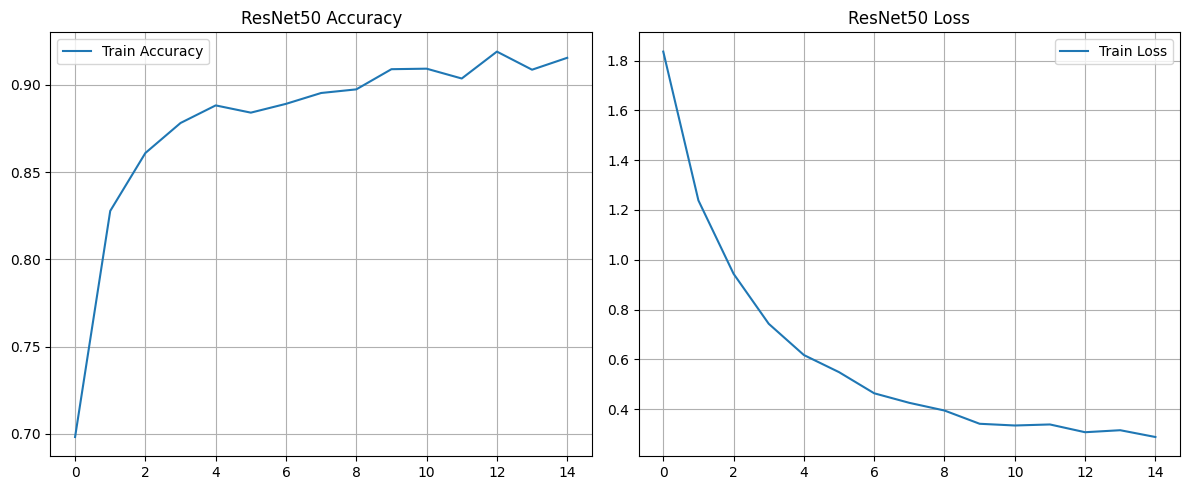

53/53 ━━━━━━━━━━━━━━━━━━━━ 14s 197ms/step


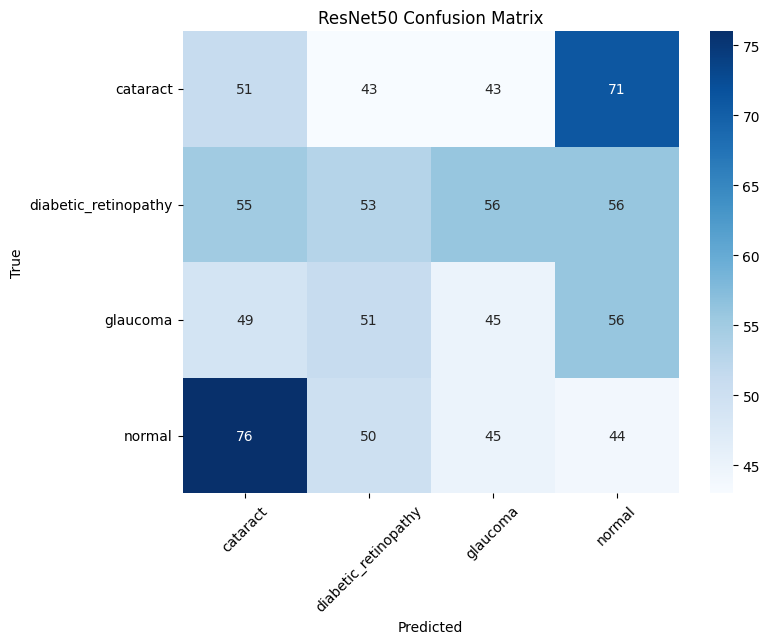

ResNet50 Classification Report:

                      precision    recall  f1-score   support

            cataract       0.22      0.25      0.23       208
diabetic_retinopathy       0.27      0.24      0.25       220
            glaucoma       0.24      0.22      0.23       201
              normal       0.19      0.20      0.20       215

            accuracy                           0.23       844
           macro avg       0.23      0.23      0.23       844
        weighted avg       0.23      0.23      0.23       844

ResNet50 model saved as ResNet50.h5

Training VGG16...
Epoch 1/15
211/211 ━━━━━━━━━━━━━━━━━━━━ 125s 461ms/step - accuracy: 0.3480 - loss: 2.1983
Epoch 2/15
211/211 ━━━━━━━━━━━━━━━━━━━━ 99s 369ms/step - accuracy: 0.5056 - loss: 1.3905
Epoch 3/15
211/211 ━━━━━━━━━━━━━━━━━━━━ 82s 370ms/step - accuracy: 0.6082 - loss: 1.1456
Epoch 4/15
211/211 ━━━━━━━━━━━━━━━━━━━━ 78s 368ms/step - accuracy: 0.6264 - loss: 1.0219
Epoch 5/15
211/211 ━━━━━━━━━━━━━━━━━━━━ 83s 371ms/step -

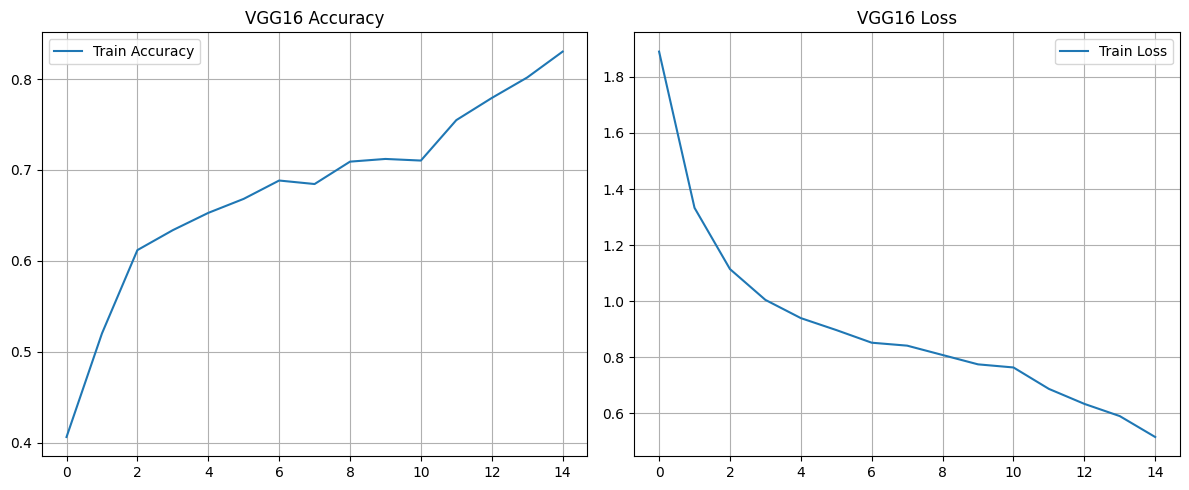

53/53 ━━━━━━━━━━━━━━━━━━━━ 9s 153ms/step


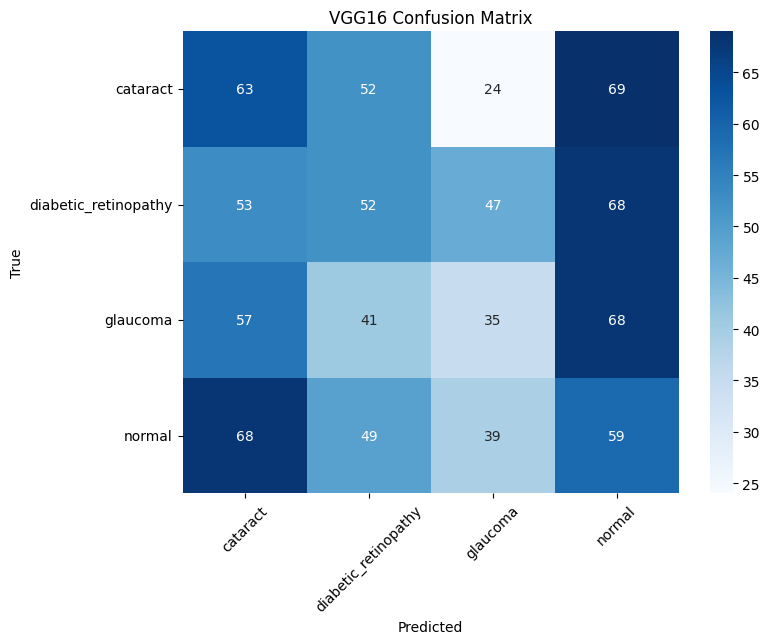

VGG16 Classification Report:



                      precision    recall  f1-score   support

            cataract       0.26      0.30      0.28       208
diabetic_retinopathy       0.27      0.24      0.25       220
            glaucoma       0.24      0.17      0.20       201
              normal       0.22      0.27      0.25       215

            accuracy                           0.25       844
           macro avg       0.25      0.25      0.25       844
        weighted avg       0.25      0.25      0.25       844

VGG16 model saved as VGG16.h5



In [ ]:
# cc

main code

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Found 844 validated image filenames belonging to 4 classes.

🔍 Loading model: DenseNet121


📊 Evaluating on test data...


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


DenseNet121 Accuracy: 0.9230, Loss: 0.2434
📈 Generating predictions and report...
53/53 ━━━━━━━━━━━━━━━━━━━━ 25s 290ms/step


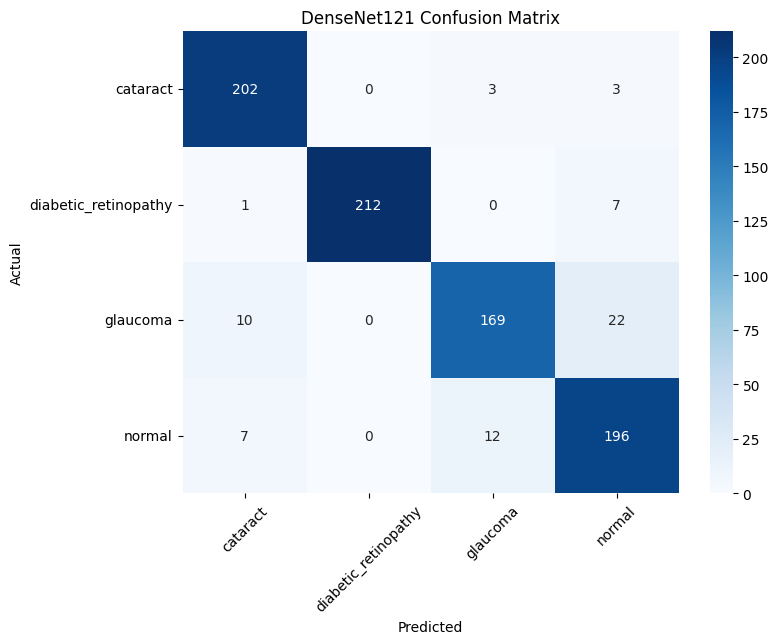

DenseNet121 Classification Report:
                      precision    recall  f1-score   support

            cataract       0.92      0.97      0.94       208
diabetic_retinopathy       1.00      0.96      0.98       220
            glaucoma       0.92      0.84      0.88       201
              normal       0.86      0.91      0.88       215

            accuracy                           0.92       844
           macro avg       0.92      0.92      0.92       844
        weighted avg       0.92      0.92      0.92       844


🔍 Loading model: ResNet50


📊 Evaluating on test data...
ResNet50 Accuracy: 0.8910, Loss: 0.3465
📈 Generating predictions and report...
53/53 ━━━━━━━━━━━━━━━━━━━━ 15s 231ms/step


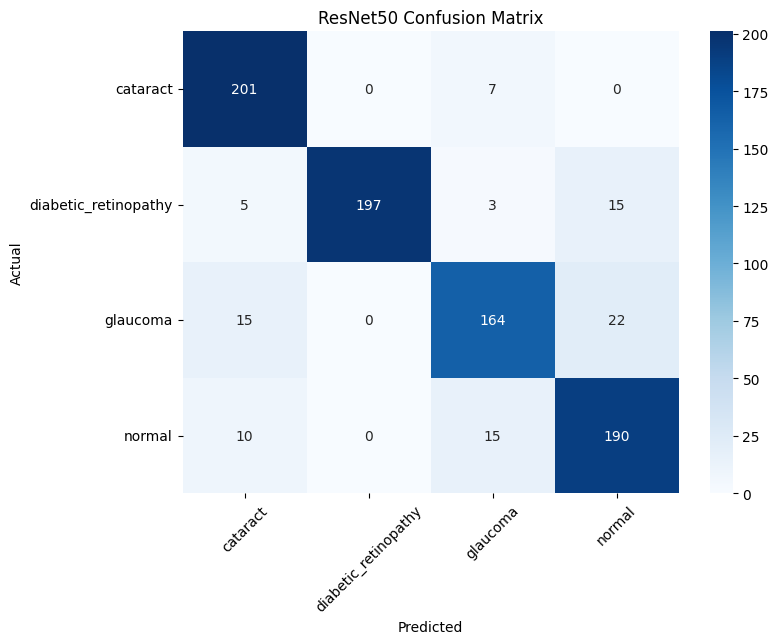

ResNet50 Classification Report:
                      precision    recall  f1-score   support

            cataract       0.87      0.97      0.92       208
diabetic_retinopathy       1.00      0.90      0.94       220
            glaucoma       0.87      0.82      0.84       201
              normal       0.84      0.88      0.86       215

            accuracy                           0.89       844
           macro avg       0.89      0.89      0.89       844
        weighted avg       0.89      0.89      0.89       844


🔍 Loading model: VGG16


📊 Evaluating on test data...
VGG16 Accuracy: 0.8400, Loss: 0.4302
📈 Generating predictions and report...
53/53 ━━━━━━━━━━━━━━━━━━━━ 9s 155ms/step


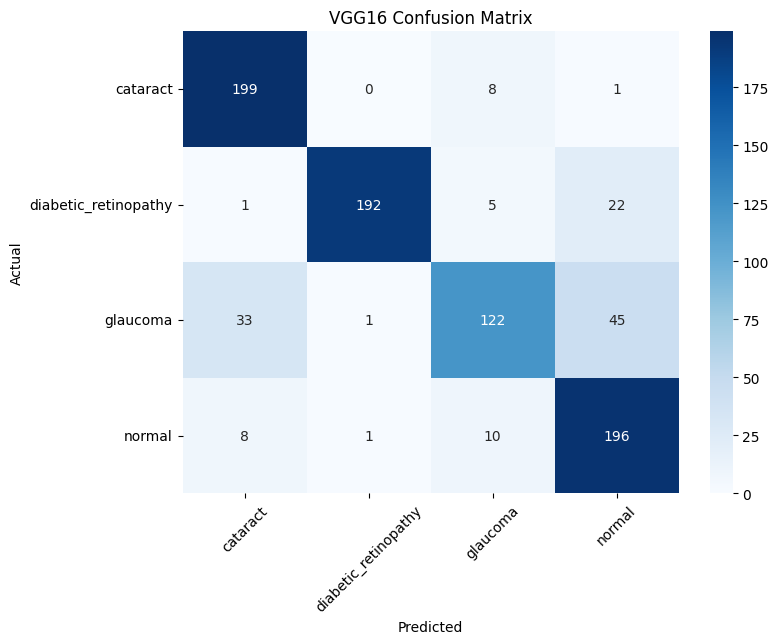

VGG16 Classification Report:
                      precision    recall  f1-score   support

            cataract       0.83      0.96      0.89       208
diabetic_retinopathy       0.99      0.87      0.93       220
            glaucoma       0.84      0.61      0.71       201
              normal       0.74      0.91      0.82       215

            accuracy                           0.84       844
           macro avg       0.85      0.84      0.83       844
        weighted avg       0.85      0.84      0.84       844



In [ ]:
# Imports
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load dataset
data_dir = '/kaggle/input/eye-diseases-classification/dataset'
filepaths, labels = [], []
for folder in os.listdir(data_dir):
    for file in os.listdir(os.path.join(data_dir, folder)):
        filepaths.append(os.path.join(data_dir, folder, file))
        labels.append(folder)

df = pd.DataFrame({'filepaths': filepaths, 'labels': labels})

# Only test split (assuming models are pre-trained)
_, test_df = train_test_split(df, test_size=0.2, stratify=df['labels'], random_state=42)

# Data generator for test set
test_gen = ImageDataGenerator(rescale=1./255).flow_from_dataframe(
    test_df,
    x_col='filepaths',
    y_col='labels',
    target_size=(224, 224),
    class_mode='categorical',
    batch_size=16,
    shuffle=False
)

# Evaluation utility function
def evaluate_model(model_path, model_name):
    print(f"\n🔍 Loading model: {model_name}")
    model = load_model(model_path)

    print("📊 Evaluating on test data...")
    loss, acc = model.evaluate(test_gen, verbose=0)
    print(f"{model_name} Accuracy: {acc:.4f}, Loss: {loss:.4f}")

    print("📈 Generating predictions and report...")
    y_true = test_gen.classes
    class_names = list(test_gen.class_indices.keys())
    y_pred_probs = model.predict(test_gen)
    y_pred = np.argmax(y_pred_probs, axis=1)

    # Confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names, yticklabels=class_names)
    plt.title(f"{model_name} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.show()

    print(f"{model_name} Classification Report:")
    print(classification_report(y_true, y_pred, target_names=class_names))

# Run evaluation for DenseNet121, ResNet50, and VGG16
evaluate_model('/content/drive/MyDrive/model/DenseNet121.h5', 'DenseNet121')
evaluate_model('/content/drive/MyDrive/model/ResNet50.h5', 'ResNet50')
evaluate_model('/content/drive/MyDrive/model/VGG16.h5', 'VGG16')
